In [1]:
%matplotlib inline
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.table import Table
from scipy import interpolate

In [2]:
bands = ['VIS', 'Y', 'J', 'H']

## Compute the mean of each filter

In [3]:
def mean_trans(lbd, trans):
    """ Return the mean
    wavelength of the transmission
    """
    
    norm = np.trapz(trans, lbd)
    return np.trapz(trans*lbd, lbd)/norm

def std_trans(lbd, trans):
    """ Return the width
    in wavelength of 
    the filter
    """

    norm = np.trapz(trans, lbd)
    mean_lambda = mean_trans(lbd, trans)
    result = np.sqrt(
        np.trapz((
            mean_lambda-lbd)**2*trans, lbd)/norm)
    
    return result

In [4]:
wavelength = {}
transmissions = {}
reference_transmission = {}
mean_of_reference = {}
std_of_reference = {}
for band in bands:
    transmissions[band] = []
    for i in range(1, 9):
        transmission = Table.read(f'EuclidBands/{band}_{i}.dat', format='ascii')
        transmissions[band].append(transmission['col2'])
    reference_transmission[band] = transmissions[band][7]
    wavelength[band] = transmission['col1']
    mean_of_reference[band] = mean_trans(wavelength[band], reference_transmission[band])
    std_of_reference[band] = std_trans(wavelength[band], reference_transmission[band])

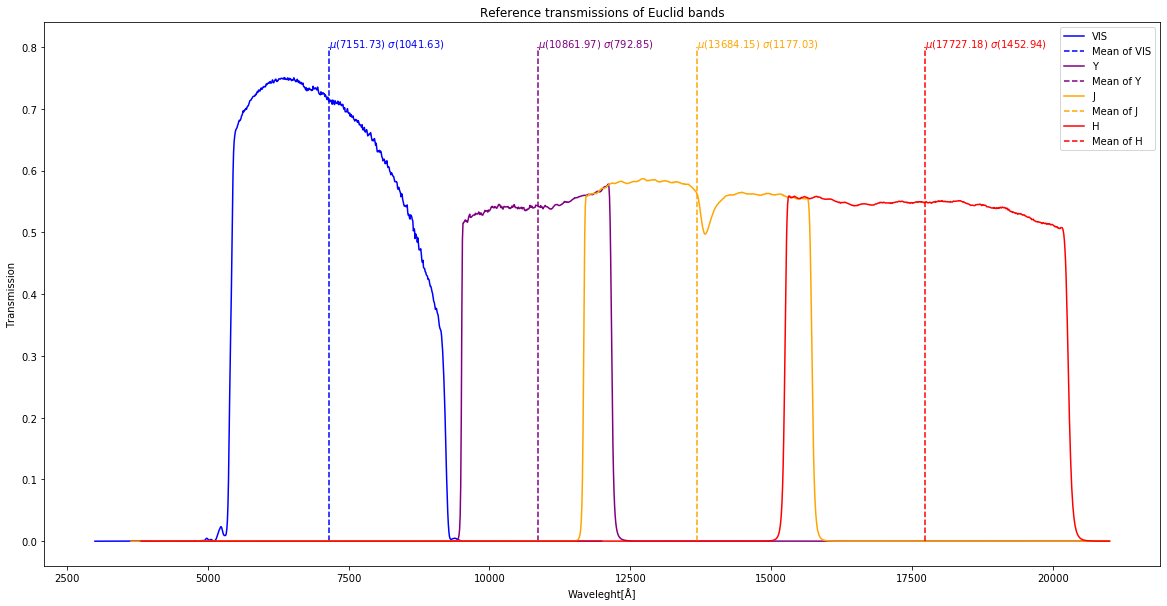

In [5]:
plt.figure(figsize=(20,10))
colors = itertools.cycle(['blue', 'purple', 'orange', 'red'])
for band in bands:
    c = next(colors)
    plt.plot(wavelength[band], reference_transmission[band], c=c, label=band)
    plt.plot([mean_of_reference[band]] * 2, [0., .8], '--', c=c, label=f'Mean of {band}')
    plt.text(
        mean_of_reference[band], .8,
        f'$\mu({mean_of_reference[band]:.2f})$ $\sigma({std_of_reference[band]:.2f})$', c=c
    )
plt.ylabel('Transmission')
plt.xlabel('Waveleght[Å]')
plt.title('Reference transmissions of Euclid bands')
plt.legend()
plt.show()

## Compute moment differences

In [6]:
mean_diff = {}
std_diff = {}
for band in bands:
    mean_diff[band] = []
    std_diff[band] = []
    for i in range(8):
        mean = mean_trans(wavelength[band], transmissions[band][i])
        std = std_trans(wavelength[band], transmissions[band][i])
        mean_diff[band].append(mean_of_reference[band] - mean)
        std_diff[band].append(std_of_reference[band] - std)

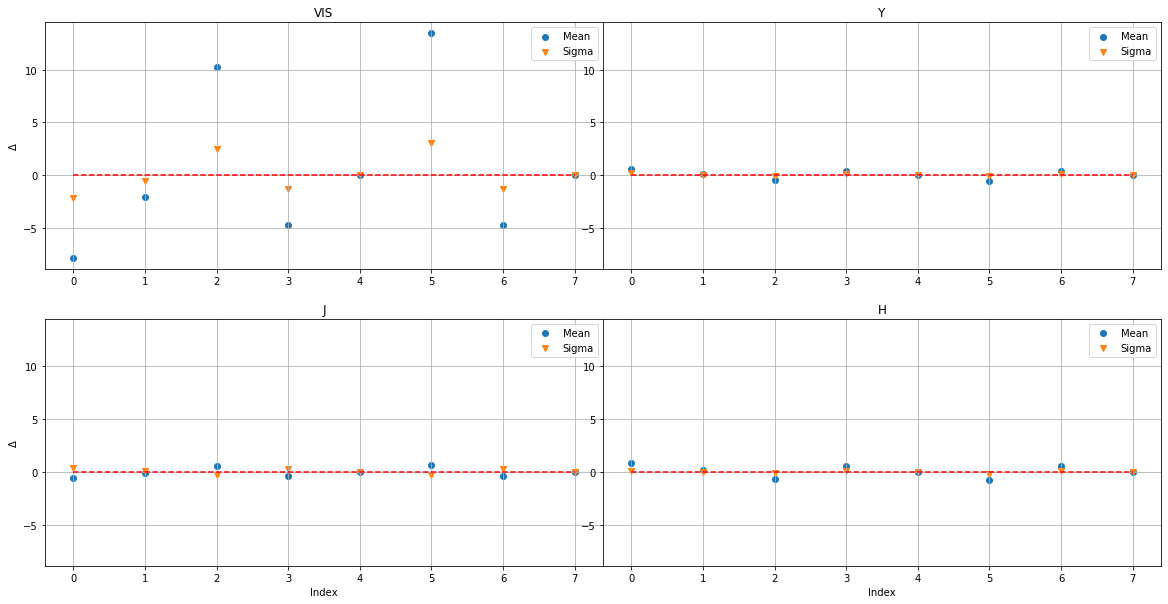

In [7]:
fig = plt.figure(figsize=(20, 10))
gs1 = gridspec.GridSpec(2, 2)
gs1.update(wspace=0.0, hspace=0.2)

ax = None
for i, band in enumerate(bands):
    ax = fig.add_subplot(gs1[i], sharey=ax)
    ax.plot([0, 7], [0, 0], '--', c='red')
    ax.scatter(np.arange(0, 8), mean_diff[band], marker='o', label='Mean')
    ax.scatter(np.arange(0, 8), std_diff[band], marker='v', label='Sigma')
    ax.legend()
    ax.grid()
    ax.set_title(band)
    if i % 2 == 0:
        ax.set_ylabel('$\Delta$')
    if i // 2 == 1:
        ax.set_xlabel('Index')